In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy.interpolate import RectBivariateSpline
from skimage.registration import phase_cross_correlation
from scipy.ndimage import shift
import napari

In [2]:
data_dir = 'data/images'

from pathlib import Path
loadpath = Path(data_dir)
filepaths = list(loadpath.glob('**/*5.jpg'))
filepaths

[WindowsPath('data/images/113-5.jpg'),
 WindowsPath('data/images/125-5.jpg'),
 WindowsPath('data/images/127-5.jpg')]

In [3]:
filepath = filepaths[1]

In [4]:
images = []
for filepath in filepaths:
    # Load image
    image = Image.open(filepath)

    # Convert the images to grayscale
    gray_image = image.convert('L')

    # Convert the grayscale images into numpy array
    image_data = np.array(gray_image)

    # add data from individual image to list with data from all images
    images.append(image_data)

images = np.array(images)

In [5]:
images.shape

(3, 2075, 2208)

In [7]:

# create x- and y-basis vectors
basis_size_x = 2100
basis_size_y = 2300
x_basis = np.arange(basis_size_x)
y_basis = np.arange(basis_size_y)

images_new_basis = []
for i in range(images.shape[0]):
    image_data = images[i]

    # create interpolation function
    x = np.arange(image_data.shape[0])
    y = np.arange(image_data.shape[1])
    interp_func = RectBivariateSpline(x, y, image_data)

    # interpolate image on new basis
    image_new_basis = interp_func(x_basis, y_basis)

    images_new_basis.append(image_new_basis)

images_new_basis = np.array(images_new_basis)

In [ ]:
images_new_basis.shape

(3, 7700, 9000)

In [8]:
shift_val, _, _ = phase_cross_correlation(images_new_basis[0], images_new_basis[1])
shift_val

array([128.,   7.])

In [10]:
aligned = shift(images_new_basis[1], shift=shift_val) 

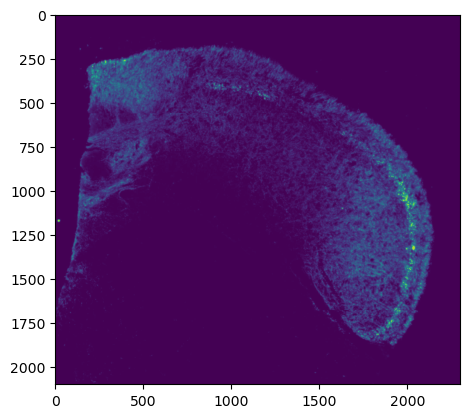

In [12]:
plt.imshow(aligned)

In [ ]:
images.shape

(3, 7655, 8960)

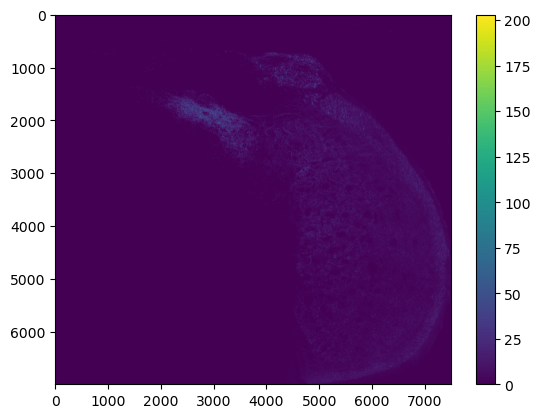

In [63]:
plt.imshow(image_new_basis[:7000, :7500])
plt.colorbar()

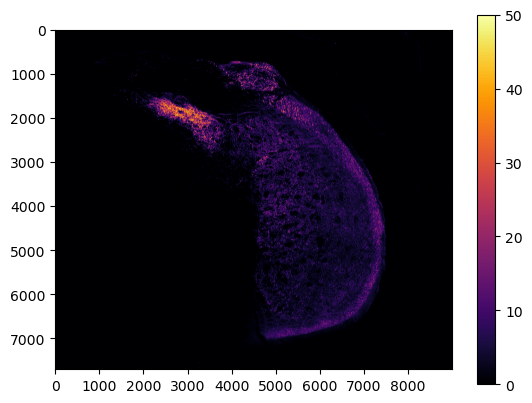

In [64]:
image_filtered = np.zeros_like(image_new_basis)

image_filtered[image_new_basis < 50] = image_new_basis[image_new_basis < 50]

plt.imshow(image_filtered, cmap = 'inferno')
plt.colorbar()

{'bodies': [<matplotlib.collections.FillBetweenPolyCollection at 0x1bea3f141a0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1beb575d810>,
 'cmins': <matplotlib.collections.LineCollection at 0x1beb575d950>,
 'cbars': <matplotlib.collections.LineCollection at 0x1beb575da90>}

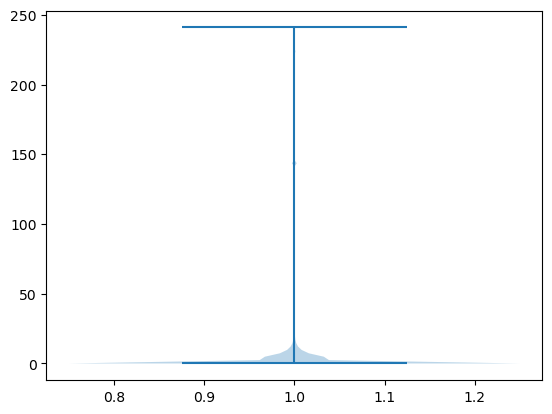

In [67]:
plt.violinplot(image_new_basis[image_new_basis > 0].flatten())

(array([4.1375452e+07, 1.5486220e+06, 2.3468900e+05, 8.2672000e+04,
        2.7705000e+04, 2.7710000e+03, 4.9200000e+02, 1.8400000e+02,
        1.4000000e+01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 4.1206800e+05, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 7.6530000e+03,
        1.0000000e+00, 0.0000000e+00, 3.1386000e+05, 0.0000000e+00]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240.]),
 <BarContainer object of 24 artists>)

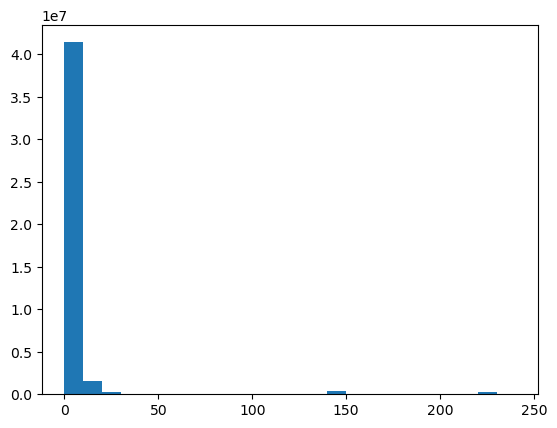

In [68]:
bins = np.arange(0, image_new_basis.max(), 10)

plt.hist(image_new_basis.flatten(), bins = bins)

#### Napari

In [ ]:
viewer = napari.Viewer()

viewer.add_image(images)

proj = images.mean(axis=0)
plt.imshow(proj, cmap='gray')

shift_val, _, _ = phase_cross_correlation(images[0], images[1])
shift_val

<Image layer 'images' at 0x164ca348910>